In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-prediction-in-chicago-in-2022/Crime Prediction in Chicago_Dataset.csv


# **Import**

In [2]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **1. Data Import & EDA**

In [3]:
df = pd.read_csv('/kaggle/input/crime-prediction-in-chicago-in-2022/Crime Prediction in Chicago_Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239558 entries, 0 to 239557
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    239558 non-null  int64  
 1   Case Number           239558 non-null  object 
 2   Date                  239558 non-null  object 
 3   Block                 239558 non-null  object 
 4   IUCR                  239558 non-null  object 
 5   Primary Type          239558 non-null  object 
 6   Description           239558 non-null  object 
 7   Location Description  238593 non-null  object 
 8   Arrest                239558 non-null  bool   
 9   Domestic              239558 non-null  bool   
 10  Beat                  239558 non-null  int64  
 11  District              239558 non-null  int64  
 12  Ward                  239548 non-null  float64
 13  Community Area        239558 non-null  int64  
 14  FBI Code              239558 non-null  object 
 15  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,239558.0,1.273144e+07,708201.948304,26543.000000,1.267802e+07,1.276893e+07,1.285704e+07,1.363051e+07
Beat,239558.0,1.154023e+03,707.909870,111.000000,5.330000e+02,1.033000e+03,1.731000e+03,2.535000e+03
District,239558.0,1.131053e+01,7.075550,1.000000,5.000000e+00,1.000000e+01,1.700000e+01,3.100000e+01
Ward,239548.0,2.338503e+01,14.210565,1.000000,9.000000e+00,2.400000e+01,3.500000e+01,5.000000e+01
Community Area,239558.0,3.626847e+01,21.553814,1.000000,2.200000e+01,3.200000e+01,5.300000e+01,7.700000e+01
X Coordinate,234891.0,1.165381e+06,16793.753273,0.000000,1.153949e+06,1.167256e+06,1.176856e+06,1.205119e+06
Y Coordinate,234891.0,1.887038e+06,32295.639692,0.000000,1.859284e+06,1.893383e+06,1.910066e+06,1.951493e+06
Year,239558.0,2.022000e+03,0.000000,2022.000000,2.022000e+03,2.022000e+03,2.022000e+03,2.022000e+03
Latitude,234891.0,4.184561e+01,0.088833,36.619446,4.176917e+01,4.186307e+01,4.190902e+01,4.202255e+01
Longitude,234891.0,-8.766860e+01,0.061010,-91.686566,-8.771015e+01,-8.766147e+01,-8.762640e+01,-8.752453e+01


In [6]:
df['Location Description'].value_counts().head(10)

Location Description
STREET                                    67640
APARTMENT                                 45748
RESIDENCE                                 30603
SIDEWALK                                  12059
PARKING LOT / GARAGE (NON RESIDENTIAL)     9333
SMALL RETAIL STORE                         7261
ALLEY                                      5019
RESTAURANT                                 4867
OTHER (SPECIFY)                            3629
COMMERCIAL / BUSINESS OFFICE               3599
Name: count, dtype: int64

In [7]:
df['Primary Type'].value_counts().head(10)

Primary Type
THEFT                  54886
BATTERY                40946
CRIMINAL DAMAGE        27248
MOTOR VEHICLE THEFT    21463
ASSAULT                20809
DECEPTIVE PRACTICE     16854
OTHER OFFENSE          14609
ROBBERY                 8963
WEAPONS VIOLATION       8780
BURGLARY                7593
Name: count, dtype: int64

**Missing Value Check**

In [8]:
df.isna().sum()

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     965
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      10
Community Area             0
FBI Code                   0
X Coordinate            4667
Y Coordinate            4667
Year                       0
Updated On                 0
Latitude                4667
Longitude               4667
Location                4667
dtype: int64

**Duplicated value check**

In [9]:
df.duplicated().sum()

0

In [10]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12592454,JF113025,1/14/2022 15:55,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,False,True,...,16.0,68,26,1170805.0,1860170.0,2022,9/14/2023 15:41,41.771782,-87.649437,"(41.771782439, -87.649436929)"
1,12785595,JF346553,8/5/2022 21:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,True,False,...,5.0,69,17,1185135.0,1857211.0,2022,9/14/2023 15:41,41.763338,-87.597001,"(41.763337967, -87.597001131)"
2,12808281,JF373517,8/14/2022 14:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,...,39.0,11,17,1138383.0,1937953.0,2022,9/14/2023 15:41,41.985875,-87.766404,"(41.985875279, -87.766403857)"
3,12888104,JF469015,11/10/2022 3:47,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,False,False,...,17.0,68,15,1169903.0,1856822.0,2022,9/14/2023 15:41,41.762615,-87.652840,"(41.76261474, -87.652840463)"
4,13209277,JG422539,8/15/2022 9:00,0000X W JACKSON BLVD,810,THEFT,OVER $500,COMMERCIAL / BUSINESS OFFICE,False,False,...,4.0,32,6,NaN,NaN,2022,9/14/2023 15:43,NaN,NaN,NaN


# **2. Data Transform for Visualization**

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Updated On'] = pd.to_datetime(df['Updated On'])

In [12]:
df = df.dropna()
df = df.drop(columns=['Year','Location'])

In [13]:
df['Arrest'] = df['Arrest'].map({ False : '0' , True : '1'})
df['Domestic'] = df['Domestic'].map({ False : '0' , True : '1'})

## **Data Check**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234238 entries, 0 to 239557
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    234238 non-null  int64         
 1   Case Number           234238 non-null  object        
 2   Date                  234238 non-null  datetime64[ns]
 3   Block                 234238 non-null  object        
 4   IUCR                  234238 non-null  object        
 5   Primary Type          234238 non-null  object        
 6   Description           234238 non-null  object        
 7   Location Description  234238 non-null  object        
 8   Arrest                234238 non-null  object        
 9   Domestic              234238 non-null  object        
 10  Beat                  234238 non-null  int64         
 11  District              234238 non-null  int64         
 12  Ward                  234238 non-null  float64       
 13  Comm

In [15]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Updated On,Latitude,Longitude
0,12592454,JF113025,2022-01-14 15:55:00,067XX S MORGAN ST,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,RESIDENCE,0,1,724,7,16.0,68,26,1170805.0,1860170.0,2023-09-14 15:41:00,41.771782,-87.649437
1,12785595,JF346553,2022-08-05 21:00:00,072XX S UNIVERSITY AVE,1544,SEX OFFENSE,SEXUAL EXPLOITATION OF A CHILD,APARTMENT,1,0,324,3,5.0,69,17,1185135.0,1857211.0,2023-09-14 15:41:00,41.763338,-87.597001
2,12808281,JF373517,2022-08-14 14:00:00,055XX W ARDMORE AVE,1562,SEX OFFENSE,AGGRAVATED CRIMINAL SEXUAL ABUSE,RESIDENCE,0,0,1621,16,39.0,11,17,1138383.0,1937953.0,2023-09-14 15:41:00,41.985875,-87.766404
3,12888104,JF469015,2022-11-10 03:47:00,072XX S MAY ST,1477,WEAPONS VIOLATION,RECKLESS FIREARM DISCHARGE,STREET,0,0,733,7,17.0,68,15,1169903.0,1856822.0,2023-09-14 15:41:00,41.762615,-87.652840
5,12622465,JF149923,2022-02-19 10:36:00,010XX N FRANCISCO AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,HOSPITAL BUILDING / GROUNDS,1,1,1211,12,26.0,24,08B,1156861.0,1906972.0,2023-09-15 15:41:00,41.900506,-87.699285


# **3. Data Visualization**

In [16]:
num_cols = df.select_dtypes(include = ['int64','float64']).drop(columns=['ID']).columns

## **Histogram**

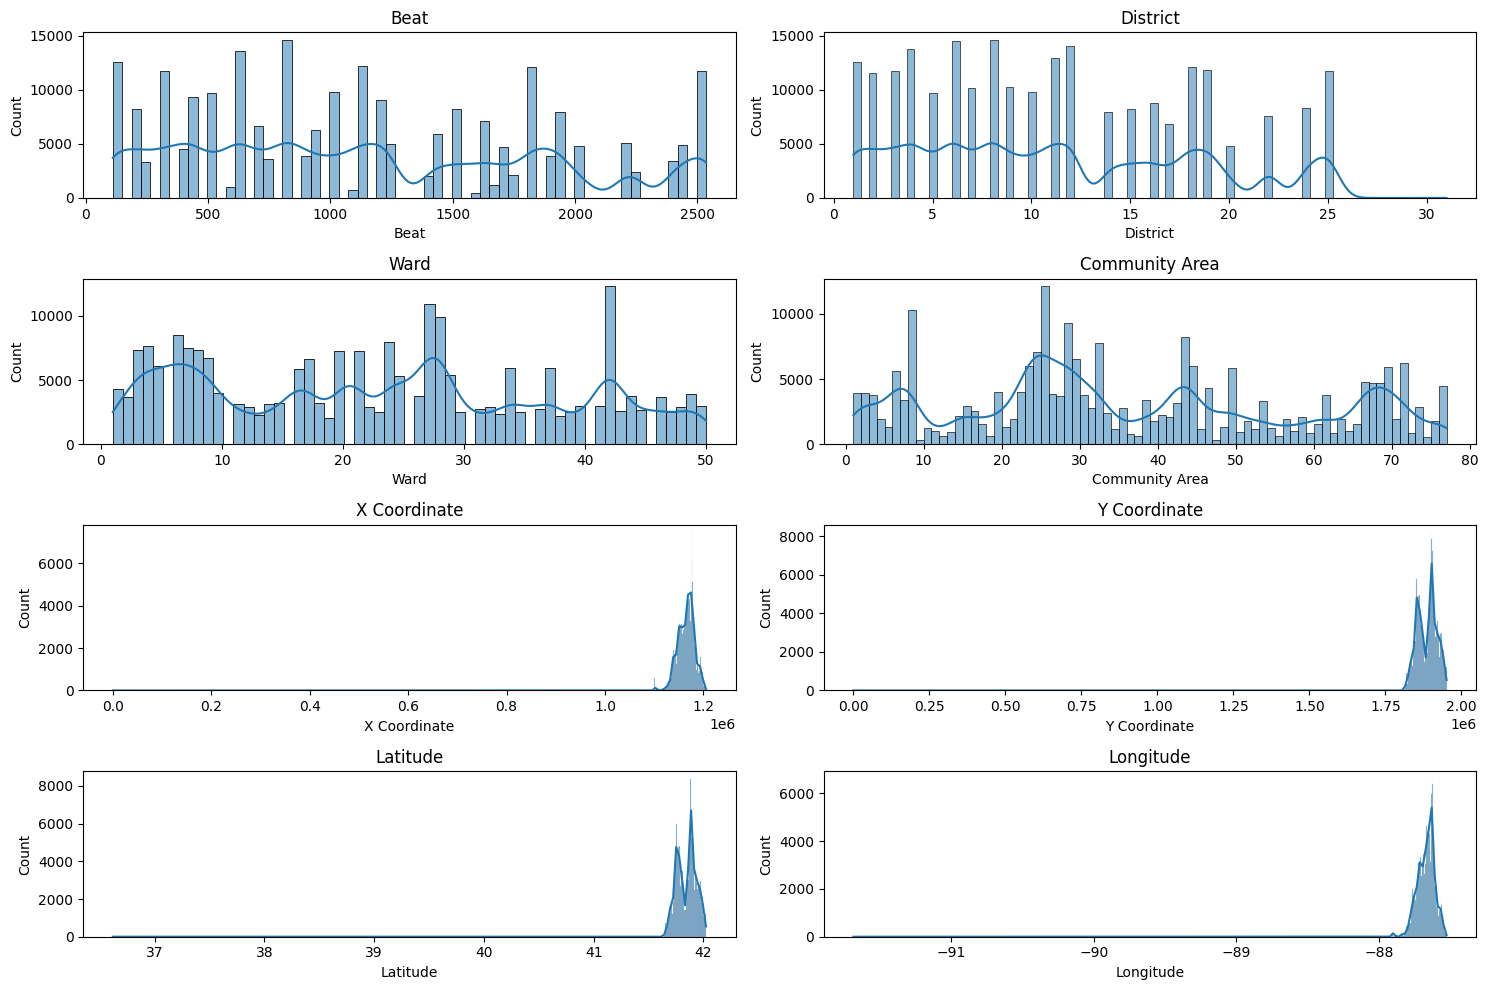

In [17]:
f, ax = plt.subplots(4,2, figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)

plt.tight_layout()
plt.show() 

## **Boxplot**

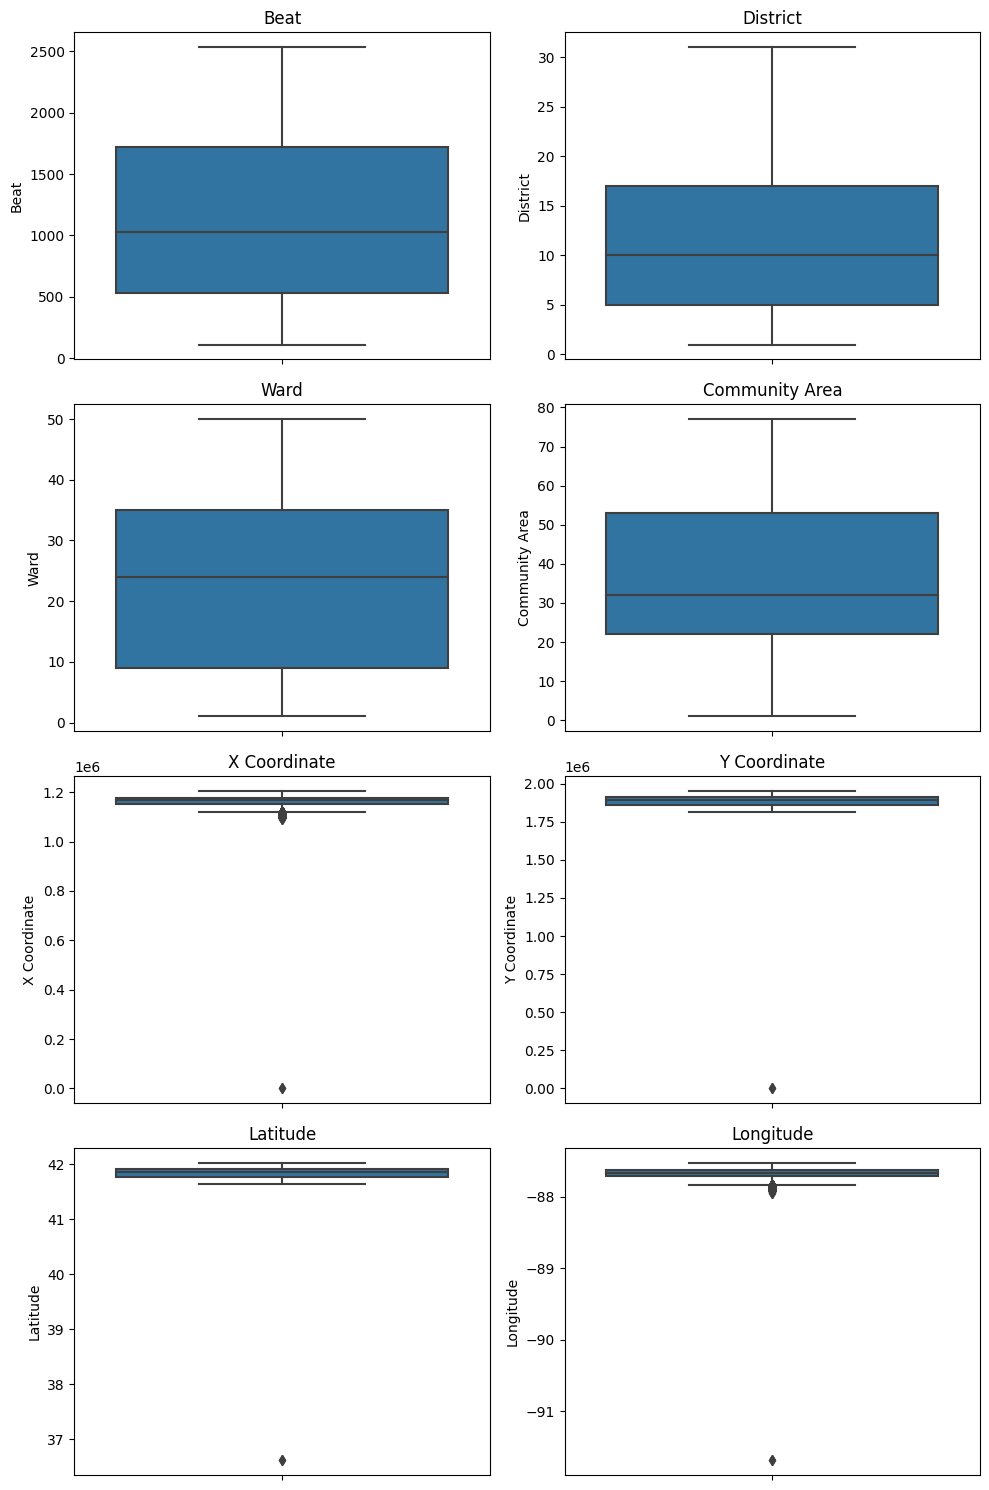

In [18]:
f, ax = plt.subplots(4,2 , figsize=(10,15))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(df, y= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

## **CountPlot**

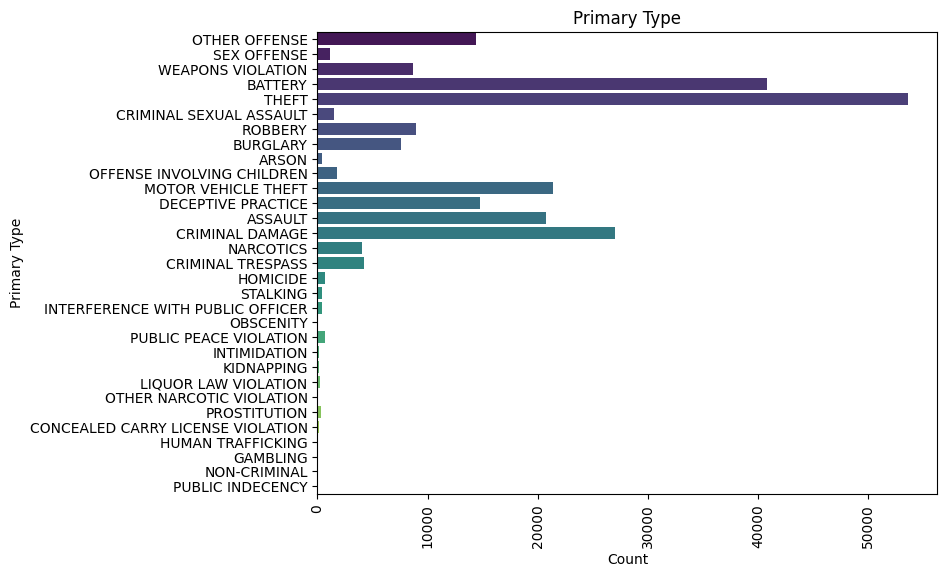

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Primary Type', palette='viridis') 
plt.title('Primary Type')
plt.ylabel('Primary Type')
plt.xticks(rotation=90)
plt.xlabel('Count')
plt.show()

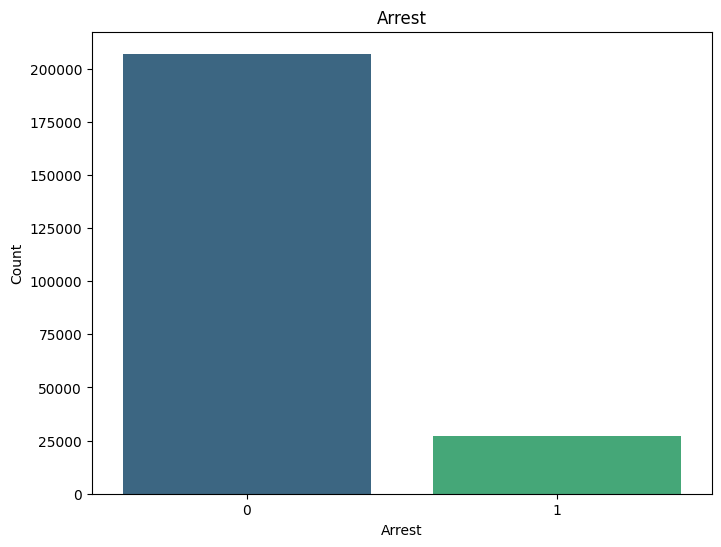

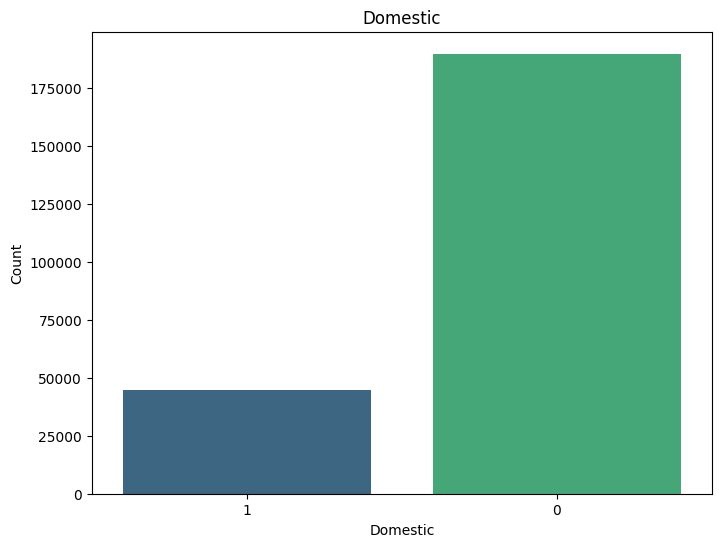

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Arrest', palette='viridis') 
plt.title('Arrest')
plt.xlabel('Arrest')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Domestic', palette='viridis') 
plt.title('Domestic')
plt.xlabel('Domestic')
plt.ylabel('Count')
plt.show()

## **Correlation**

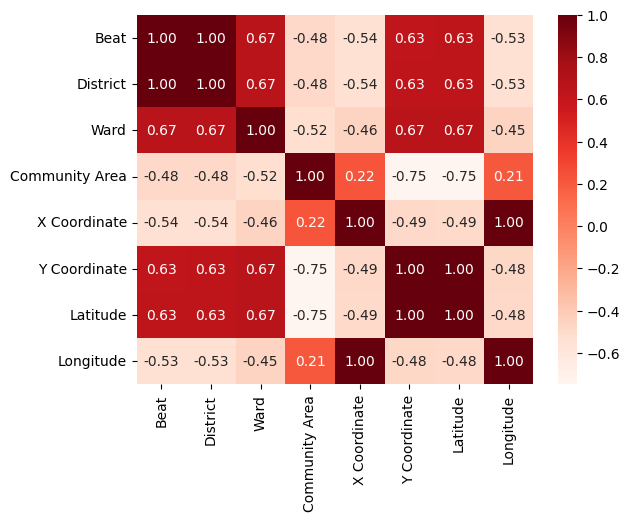

In [21]:
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

## **Primary Type Top 10**

In [22]:
top10_primary = df.groupby(['Primary Type']).size().reset_index(name='count').sort_values(by = 'count', ascending = False)[0:10]

In [23]:
top10_primary

,Primary Type,count
29,THEFT,53621
2,BATTERY,40800
5,CRIMINAL DAMAGE,27028
16,MOTOR VEHICLE THEFT,21386
1,ASSAULT,20737
8,DECEPTIVE PRACTICE,14737
22,OTHER OFFENSE,14369
26,ROBBERY,8952
30,WEAPONS VIOLATION,8709
3,BURGLARY,7563


In [24]:
px.bar(top10_primary, x = 'count', y='Primary Type', title = 'Primary Type Top 10', text_auto = True)

## **Domestic and foreign crime rates**

In [25]:
df_ = df.groupby(['Domestic']).size().reset_index(name='count')

In [26]:
df_['Domestic'] = df_['Domestic'].map({'0': 'Non Domestic' , '1':'Domestic'})
df_

,Domestic,count
0,Non Domestic,189699
1,Domestic,44539


In [27]:
fig = px.pie(df_ , values = 'count',names= 'Domestic',title = 'Domestic and Non Domestic crime rates')
fig.update_traces(textposition='outside',textinfo='label + percent + value')

# **4. Modeling**

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report

In [29]:
Feature = ['Date','Block','Primary Type','Description',	'Location Description',	'Domestic',	'Beat',	'District',	'Ward']

## **LabelEncoding**

In [30]:
label_encoder = LabelEncoder()

for cols in Feature:
    df[cols] = label_encoder.fit_transform(df[cols])

In [31]:
x = df[Feature]
y = df['Arrest']

## **SMOTE**

In [32]:
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x, y)

In [33]:
y_smote.value_counts()

Arrest
0    207001
1    207001
Name: count, dtype: int64

## **Train Test Split**

In [34]:
x_train, x_test, y_train, y_test =train_test_split(x_smote,y_smote , random_state = 42, test_size= 0.2)

## **StandardScale**

In [35]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [36]:
y_train = label_encoder.fit_transform(y_train)

## **ML**

In [37]:
rfc = RandomForestClassifier(random_state=42)
abc = AdaBoostClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

models = [rfc, abc, gbc, xgb]

names = ["Random Forest", "Ada Boost",
        "Gradient Boostng", "XGBoost"]

Random Forest accuracy: 0.9488774290165578
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     41301
           1       0.97      0.93      0.95     41500

    accuracy                           0.95     82801
   macro avg       0.95      0.95      0.95     82801
weighted avg       0.95      0.95      0.95     82801



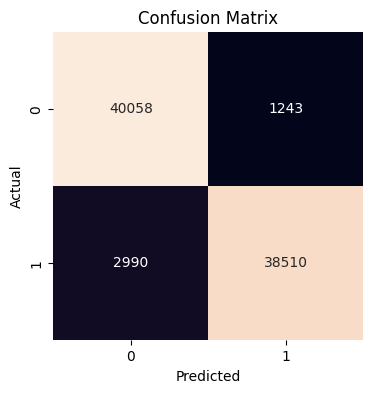

--------------------------------------------------
Ada Boost accuracy: 0.81933793070132
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     41301
           1       0.82      0.81      0.82     41500

    accuracy                           0.82     82801
   macro avg       0.82      0.82      0.82     82801
weighted avg       0.82      0.82      0.82     82801



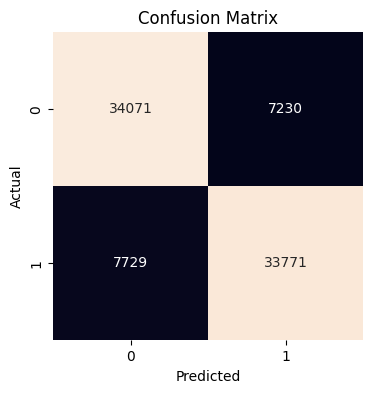

--------------------------------------------------
Gradient Boostng accuracy: 0.8933225444137148
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     41301
           1       0.92      0.87      0.89     41500

    accuracy                           0.89     82801
   macro avg       0.89      0.89      0.89     82801
weighted avg       0.89      0.89      0.89     82801



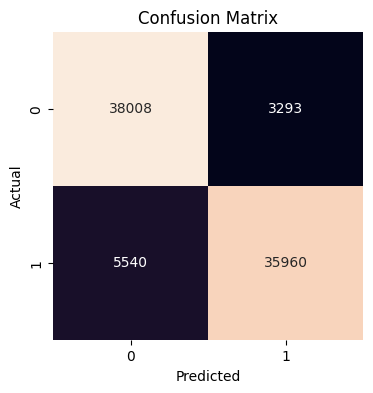

--------------------------------------------------
XGBoost accuracy: 0.9466431564836173
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     41301
           1       0.98      0.91      0.94     41500

    accuracy                           0.95     82801
   macro avg       0.95      0.95      0.95     82801
weighted avg       0.95      0.95      0.95     82801



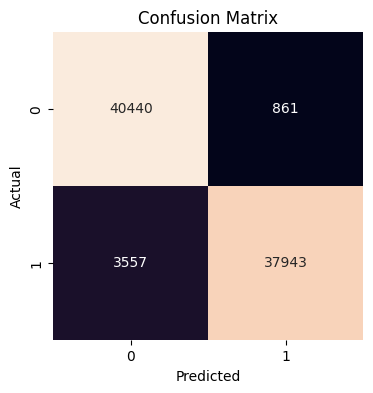

--------------------------------------------------


In [38]:
index = 0
ac = []

for name, model in enumerate(models):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    pred = label_encoder.inverse_transform(pred)
    accuracy = accuracy_score(y_test, pred)
    ac.append(accuracy)
    cm = confusion_matrix(y_test, pred)
    
    print(f'{names[index]} accuracy: {accuracy}')
    print(classification_report(y_test, pred))
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt="d", cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("-"*50)
    index += 1

## **Model Comparison**

In [39]:
acc_df = pd.DataFrame({'Model': names, 'Accuracy': ac})
acc_df['Accuracy'] = acc_df['Accuracy']*100
acc_df

,Model,Accuracy
0,Random Forest,94.887743
1,Ada Boost,81.933793
2,Gradient Boostng,89.332254
3,XGBoost,94.664316


In [40]:
px.bar(acc_df , x= 'Accuracy', y='Model', text_auto = True,  title = 'Model Accuracy', orientation='h', template='plotly_dark')

**Thankyou. Please leave your advice in the comments**